# 1.2 Método *regula falsi*

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/caramirezs/MetNum_202210/blob/main/1_Ecuaciones_de_una_variable/1.2_Metodo_regula_falsi.ipynb)

In [1]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt

## Funciones en python

In [2]:
def graficar(f, x_i, x_f, num=1000):
        plt.style.use('seaborn')
        plt.ion()
        """
        Gráfica de funciones algebraicas
        :param f: función, previamente definida
        :param x_i: límite inferior del intervalo
        :param x_f: límite superior del intervalo
        :param num: división del intervalo
        :return: gráfica de la función
        """
        x = np.linspace(x_i, x_f, num)
        fig, ax = plt.subplots(figsize=(20, 8))
        ax.plot(x, f(x))
        xmin, xmax = ax.get_xlim()
        ymin, ymax = ax.get_ylim()
        ax.annotate("", xy=(xmax, 0), xytext=(xmin, 0), arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10))
        ax.annotate("", xy=(0, ymax), xytext=(0, ymin), arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10))
        #plt.show()
        
        return None

def met_regula_falsi(f, a, b, tol=1e-4, n=50, verbose=True, print_error=False, deploy_error=False):
        """
        Método de regula falsi
        :param f: Funcion a la que se le intenta encontrar una solucion
        para la ecuacion f(x)=0, previamente definida
        :param a: límite inferior
        :param b: límite superior
        :param tol: toleracia, criterio de parada
        :param n: número máximo de iteraciones, criterio de parada
        :param verbose:
        :param print_error:
        :param deploy_error:
        :return: solución exacta o aproximada, si tiene.
        """
        if not f(a) * f(b) < 0:
            print(f'El intervalo no funciona: f({a})={f(a):.2f}, f({b})={f(b):.2f}')
            return None
        i = 1
        lista_errores = [abs(b - a)]
        p_0 = a
        while i <= n:
            p_i = a - (f(a) * (b - a)) / (f(b) - f(a))  # falsa posición
            e_abs = abs(p_0 - p_i)
            if verbose:
                print(f'ite {i:<2}: a_{i - 1:<2} = {a:.4f}, b_{i - 1:<2} = {b:.4f}, p_{i:<2} = {p_i:.5f}'
                    f' | e_abs: {e_abs:e}')

            if f(p_i) == 0:
                if print_error:
                    print(f'error x iteración: {lista_errores}')
                print(f'>>> Solución exacta encontrada después de {i} iteraciones: x->{p_i:.15f}')
                if deploy_error:
                    return lista_errores, p_i
                else:
                    return p_i
            if f(a) * f(p_i) < 0:
                b = p_i
            else:
                a = p_i
            p_0 = p_i
            lista_errores.append(e_abs)
            if e_abs < tol:
                if print_error:
                    print(f'error x iteración: {lista_errores}')
                print(f'>>> Solución encontrada después de {i} iteraciones: x->{p_i:.15f}')
                if deploy_error:
                    return lista_errores, p_i
                else:
                    return p_i
            i += 1

        if print_error:
            print(f'error x iteración: {lista_errores}')
        print('solución no encontrada, iteraciones agotadas')
        return None    

El **método de posición falsa** (también llamado *Regula Falsi*) genera aproximaciones
de la misma manera que el método de la secante, pero incluye una prueba para garantizar que
la raíz siempre se agrupa entre iteraciones sucesivas. A pesar de que no es un método que por
lo general recomendamos, ilustra cómo se puede integrar la agrupación.

Este método es un intento por aumentar la rapidez del método de bisección. Los algoritmos solo se
diferencian en el punto del intervalo que calculan. Mientras en bisección es el punto medio, en regula
falsi es el corte con el eje x de la recta que une los puntos extremos de la gráfica definida en el intervalo
$[a_n, b_n]$.

Si $a_n$ y $b_n$ son los extremos del intervalo, entonces la ecuación de la recta que contiene los puntos
$(a_n, f(a_n))$ y $(b_n, f(n))$ es $y=\frac{f(b_n) - f(a_n)}{b_n-a_n}(x-a_n)+f(a_n)$,y su corte con el eje $x, a_n-\frac{f(a_n)(b_n - a_n)}{f(b_n)-f(a_n)}$, define el punto $c_n$, que se espera sea una mejor aproximación.

**Observación:** las condiciones necesarias para asegurar la convergencia del método de regula falsi
corresponden a las condiciones del método de bisección. Aunque no es posible aplicar la formula del
método de bisección para calcular la cantidad de iteraciones necesarias en su ejecución, se espera lograr
la precisión establecida en un menor número de iteraciones.

### Sobre el método de **Regula Falsi** (*método de posición falsa*)

El método sirve para encontrar un valor aproximado de $x$  de modo que $f(x) = 0$ y pertenece al tipo de métodos iterativos.

Si $f(x)= 0$, entonces $x=y$, fin del calculo

Dada una función $f(x)$ y sea continua en un intervalo $[a, b]$ se debe cumplir que $f(a)*f(b) < 0$, garantiza la convergencia

**Parametros**

* $f(x) =$ función de $x$
* $[a, b] =$ Intervalos
* $TOL$ = Tolerancia
* $n-máx$ = Número máximo de iteraciones

### El **método** explicado paso a paso:

**Paso 1:** Evaluar $f(a)$ y $f(b)$

**Paso 2:** Obtener $p_i$:

$p_i = a_n-\frac{f(a_n)(b_n - a_n)}{f(b_n)-f(a_n)}$

**Paso 3:** Obtener $f(p_i)$:

**Paso 4:** Determinar el intervalo


**Paso 5:** Calcular el error:

$eabs= |p_i-p_{i-1}|$

$eabs < TOL \to$ ***STOP***



**Gráficamente de puede interpretar el método de Regular Falsi**

<img src="imagenes/mregularfalsi.png"/>

*Imagen del libro de Burden - Análisis numérico 10ed (2017)*

**************************************



### Ejemplo práctico 1


Resolver la ecuación $e^x - sin(x) = 3x = 0 $

1. Graficar la ecuación en un intervalo a elección, para este caso el intervalo es $[0, 0.5]$:

**Datos**

$f(x) = e^x - sin(x) = 3x $

$(a, b) = (0, 0.5)$

$a = 0$

$b = 0.5$

Aproximación = $10^{-4}$

**Procedimiento:**

*Paso 1:* Se recomienda graficar antes de empezar el calculo

*Paso 2:* Evaluar $f(a)$ y $f(b)$

*Paso 3:* Obtener $p_i$

\begin{equation}
p_i = a_n-\frac{f(a_n)(b_n - a_n)}{f(b_n)-f(a_n)}
\end{equation}

*Paso 4:* Obtener $f(p_i)$

*Paso 5:* Determinar el nuevo intervalo

*Paso 6:* Calcular el error  $eabs = |p_i-p_{i-1}|$

*Nota:* El procedimiento de los *Pasos del 2 al 6* se realizan ejecutando el *met_regula_falsi()*

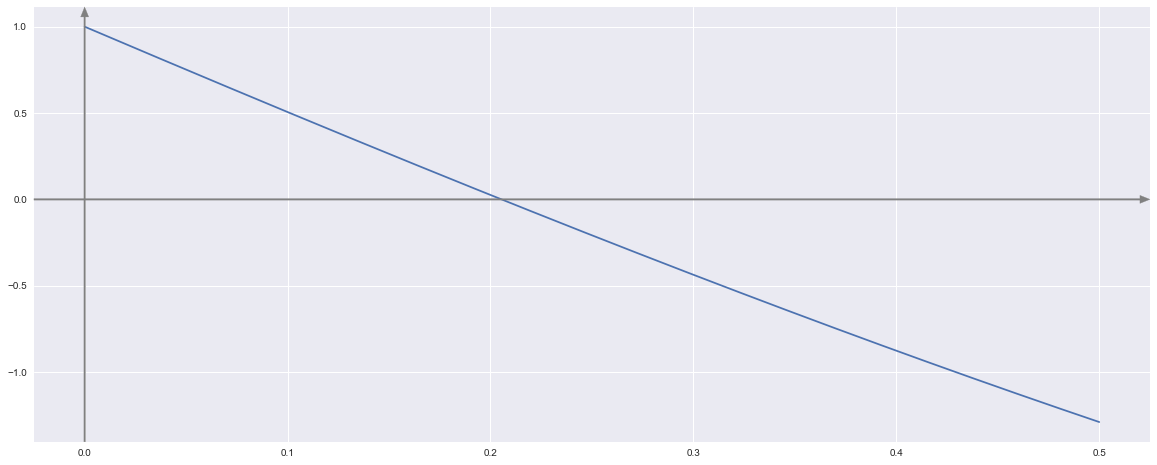

In [3]:
# Función expresada en python
f = lambda x: np.e**x - 3*np.sin(x) - 3*x
graficar(f, 0, 0.5)

In [4]:
met_regula_falsi(f, 0, 0.5, tol=1e-4)

ite 1 : a_0  = 0.0000, b_0  = 0.5000, p_1  = 0.21838 | e_abs: 2.183830e-01
ite 2 : a_1  = 0.0000, b_1  = 0.2184, p_2  = 0.20582 | e_abs: 1.256315e-02
ite 3 : a_2  = 0.0000, b_2  = 0.2058, p_3  = 0.20540 | e_abs: 4.184166e-04
ite 4 : a_3  = 0.0000, b_3  = 0.2054, p_4  = 0.20539 | e_abs: 1.374833e-05
>>> Solución encontrada después de 4 iteraciones: x->0.205387697357079


0.205387697357079

### Ejemplo práctico 2


Resolver la ecuación $x^{10} -1 = 0$

1. Graficar la ecuación en un intervalo a elección, para este caso el intervalo es $[0, 1.2]$:

**Datos**

$f(x) = x^{10} -1$

$(a, b) = (0, 1.2)$

$a = 0$

$b = 1.2$

Aproximación = $10^{-15}$

**Procedimiento:**

*Paso 1:* Se recomiennda graficar antes de empezar el calculo

*Paso 2:* Evaluar $f(a)$ y $f(b)$

*Paso 3:* Obtener $p_i$

\begin{equation}
p_i = a_n-\frac{f(a_n)(b_n - a_n)}{f(b_n)-f(a_n)}
\end{equation}

*Paso 4:* Obtener $f(p_i)$

*Paso 5:* Determunar el nuevo intervalo

*Paso 6:* Calcular el error  $eabs = |p_i-p_{i-1}|$

*Nota:* El procedimiento de los *Pasos del 2 al 6* se realizan ejecutando el *met_regula_falsi()*

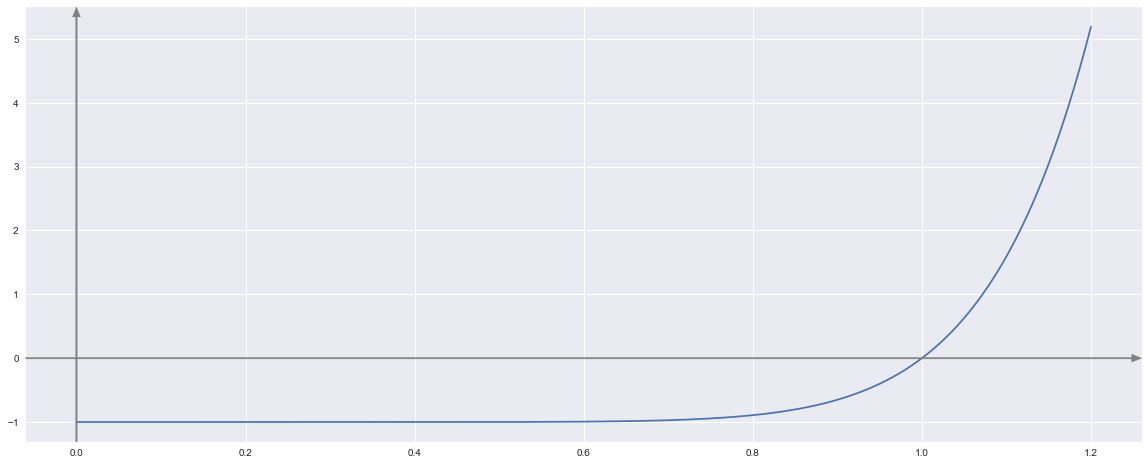

In [5]:
f = lambda x: x**10 - 1
graficar(f, 0, 1.2)

In [6]:
met_regula_falsi(f, 0, 1.2, tol=1e-15, n=500)

ite 1 : a_0  = 0.0000, b_0  = 1.2000, p_1  = 0.19381 | e_abs: 1.938067e-01
ite 2 : a_1  = 0.1938, b_1  = 1.2000, p_2  = 0.35631 | e_abs: 1.625058e-01
ite 3 : a_2  = 0.3563, b_2  = 1.2000, p_3  = 0.49257 | e_abs: 1.362565e-01
ite 4 : a_3  = 0.4926, b_3  = 1.2000, p_4  = 0.60674 | e_abs: 1.141735e-01
ite 5 : a_4  = 0.6067, b_4  = 1.2000, p_5  = 0.70201 | e_abs: 9.527059e-02
ite 6 : a_5  = 0.7020, b_5  = 1.2000, p_6  = 0.78047 | e_abs: 7.845796e-02
ite 7 : a_6  = 0.7805, b_6  = 1.2000, p_7  = 0.84340 | e_abs: 6.292635e-02
ite 8 : a_7  = 0.8434, b_7  = 1.2000, p_8  = 0.89193 | e_abs: 4.853266e-02
ite 9 : a_8  = 0.8919, b_8  = 1.2000, p_9  = 0.92767 | e_abs: 3.574009e-02
ite 10: a_9  = 0.9277, b_9  = 1.2000, p_10 = 0.95281 | e_abs: 2.513959e-02
ite 11: a_10 = 0.9528, b_10 = 1.2000, p_11 = 0.96981 | e_abs: 1.699576e-02
ite 12: a_11 = 0.9698, b_11 = 1.2000, p_12 = 0.98095 | e_abs: 1.114112e-02
ite 13: a_12 = 0.9809, b_12 = 1.2000, p_13 = 0.98809 | e_abs: 7.142969e-03
ite 14: a_13 = 0.9881, b_

0.9999999999999984